In [3]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np

%matplotlib notebook

<h1 align='center'><b>Analysis of NG Plant Efficiency</b></h1>

In [4]:
'''#EIA Emissions Spreadsheet
data = pd.read_excel('/home/alan/Desktop/Civil_Engineering/Thesis_Research/emissions2017.xlsx',
                    sheet_name = 'CO2',
                    index_col = None,
                    header = 1)
df = pd.DataFrame(data)
df = df.loc[(df['Fuel Code'] == 'NG')]
df.to_pickle('/home/alan/Desktop/Civil_Engineering/Thesis_Research/emissions2017_AZ.pkl')'''

"#EIA Emissions Spreadsheet\ndata = pd.read_excel('/home/alan/Desktop/Civil_Engineering/Thesis_Research/emissions2017.xlsx',\n                    sheet_name = 'CO2',\n                    index_col = None,\n                    header = 1)\ndf = pd.DataFrame(data)\ndf = df.loc[(df['Fuel Code'] == 'NG')]\ndf.to_pickle('/home/alan/Desktop/Civil_Engineering/Thesis_Research/emissions2017_AZ.pkl')"

In [20]:
#uncomment for Linux machine
#Emiss_df = pd.read_pickle('/home/alan/Desktop/Civil_Engineering/Thesis_Research/emissions2017_AZ.pkl')

Emiss_df = pd.read_pickle('../pickleJar/PrimeMovers.pkl')

In [21]:
heat_rate = Emiss_df[['Plant Code', 'Plant Name', 'State', 'Prime Mover', 'Fuel Consumption for Electric Generation (MMBtu)', 'Generation (kWh)']]

/data/data/com.termux/files/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [5]:
#convert Millions of Btu to Btu
heat_rate = heat_rate.apply(lambda x:x*1e6 if x.name in ['Fuel Consumption for Electric Generation (MMBtu)'] else x)

In [6]:
heat_rate['Heat Rate (Btu/kWh)'] = (heat_rate['Fuel Consumption for Electric Generation (MMBtu)']/
                                   heat_rate['Generation (kWh)'])

In [7]:
heat_rate

,Plant Code,Plant Name,State,Prime Mover,Fuel Consumption for Electric Generation (MMBtu),Generation (kWh),Heat Rate (Btu/kWh)
0,3,Barry,AL,CA,7.564700e+11,2.958047e+09,255.732921
1,3,Barry,AL,CT,5.787344e+13,5.458926e+09,10601.615959
3,3,Barry,AL,ST,1.001765e+12,9.428405e+07,10624.967850
4,7,Gadsden,AL,ST,2.224437e+12,1.932730e+08,11509.300316
7,9,Copper,TX,GT,3.570350e+11,1.891300e+07,18877.756041
8,10,Greene County,AL,GT,8.421330e+11,6.182377e+07,13621.507921
10,10,Greene County,AL,ST,9.175786e+12,8.216300e+08,11167.783552
13,26,E C Gaston,AL,ST,1.561468e+13,1.463800e+09,10667.221608
15,47,Colbert,AL,GT,2.682120e+11,1.396800e+07,19201.890034
17,51,Dolet Hills,LA,ST,2.153510e+11,1.719167e+07,12526.473577


In [8]:
heat_rate['Heat Rate (Btu/kWh)'].mean()

inf

<p>Mean returning 'inf' is an issue. Need to investigate the negative generation values. Will void out the negative values with NaN for now.</p>

In [9]:
heat_rate.loc[(heat_rate['Heat Rate (Btu/kWh)'] < 0)]

,Plant Code,Plant Name,State,Prime Mover,Fuel Consumption for Electric Generation (MMBtu),Generation (kWh),Heat Rate (Btu/kWh)
324,710,Jack McDonough,GA,GT,9.680000e+08,-64901.0,-14915.024422
367,899,Moline,IL,GT,1.270600e+10,-38000.0,-334368.421053
376,944,Geneseo,IL,IC,1.200000e+07,-3901.0,-3076.134325
420,1001,Cayuga,IN,GT,4.228000e+09,-186000.0,-22731.182796
449,1046,Dubuque,IA,ST,3.413000e+09,-1057000.0,-3228.949858
462,1084,River Hills,IA,GT,8.145000e+09,-1237000.0,-6584.478577
483,1130,Gas Turbine (IA),IA,GT,1.459600e+10,-321000.0,-45470.404984
507,1162,Maquoketa 1,IA,IC,4.680000e+08,-281842.0,-1660.504822
520,1172,Osage (IA),IA,IC,6.350000e+08,-660084.0,-961.998776
533,1192,Traer Main,IA,IC,8.900000e+07,-43746.0,-2034.471723


In [10]:
heat_rate['Generation (kWh)'] = heat_rate['Generation (kWh)'].apply(lambda x: np.nan if x <= 0 else x)
#added 1 October 2019
heat_rate['Fuel Consumption for Electric Generation (MMBtu)'] = heat_rate['Fuel Consumption for Electric Generation (MMBtu)'].apply(lambda x: np.nan if x<= 0 else x)

In [11]:
heat_rate['Heat Rate (Btu/kWh)'] = (heat_rate['Fuel Consumption for Electric Generation (MMBtu)']/
                                   heat_rate['Generation (kWh)'])

In [12]:
heat_rate

,Plant Code,Plant Name,State,Prime Mover,Fuel Consumption for Electric Generation (MMBtu),Generation (kWh),Heat Rate (Btu/kWh)
0,3,Barry,AL,CA,7.564700e+11,2.958047e+09,255.732921
1,3,Barry,AL,CT,5.787344e+13,5.458926e+09,10601.615959
3,3,Barry,AL,ST,1.001765e+12,9.428405e+07,10624.967850
4,7,Gadsden,AL,ST,2.224437e+12,1.932730e+08,11509.300316
7,9,Copper,TX,GT,3.570350e+11,1.891300e+07,18877.756041
8,10,Greene County,AL,GT,8.421330e+11,6.182377e+07,13621.507921
10,10,Greene County,AL,ST,9.175786e+12,8.216300e+08,11167.783552
13,26,E C Gaston,AL,ST,1.561468e+13,1.463800e+09,10667.221608
15,47,Colbert,AL,GT,2.682120e+11,1.396800e+07,19201.890034
17,51,Dolet Hills,LA,ST,2.153510e+11,1.719167e+07,12526.473577


In [13]:
heat_rate['Heat Rate (Btu/kWh)'].describe()

count    2.578000e+03
mean     4.045690e+04
std      9.880674e+05
min      6.378299e-02
25%      5.812903e+03
50%      1.069836e+04
75%      1.238837e+04
max      4.678800e+07
Name: Heat Rate (Btu/kWh), dtype: float64

In [14]:
init_count = heat_rate['Heat Rate (Btu/kWh)'].count()

In [15]:
#added 1 October 2019
heat_rate['Heat Rate (Btu/kWh)'] = heat_rate['Heat Rate (Btu/kWh)'].apply(lambda x: np.nan if x< 1000 else x)
heat_rate['Heat Rate (Btu/kWh)'].describe()

count    2.421000e+03
mean     4.305318e+04
std      1.019560e+06
min      1.000519e+03
25%      6.846111e+03
50%      1.090104e+04
75%      1.258144e+04
max      4.678800e+07
Name: Heat Rate (Btu/kWh), dtype: float64

In [16]:
x = heat_rate['Heat Rate (Btu/kWh)'].dropna()
#added 1 October 2019
y = heat_rate['Heat Rate (Btu/kWh)'].apply(lambda x: np.nan if x <= 1e7 else x).dropna()
y.describe()

count    3.000000e+00
mean     2.413312e+07
std      1.962025e+07
min      1.265971e+07
25%      1.280568e+07
50%      1.295165e+07
75%      2.986983e+07
max      4.678800e+07
Name: Heat Rate (Btu/kWh), dtype: float64

<h3 align = 'center'><b>Cleaning up a bit</b></h3>
<h6 align = 'center'>1 October 2019</h6>
<p>Will remove values greater than 1e6 and less than 1e3<p>

In [17]:
heat_rate['Heat Rate (Btu/kWh)'] = np.where(heat_rate['Heat Rate (Btu/kWh)'] < 1000,
                                            np.nan,
                                            np.where(heat_rate['Heat Rate (Btu/kWh)'] >= 1e5,
                                                     np.nan,
                                                     heat_rate['Heat Rate (Btu/kWh)']))
heat_rate['Heat Rate (Btu/kWh)'].dropna().describe()

count     2399.000000
mean     11115.388599
std       7313.735306
min       1000.518556
25%       6797.098421
50%      10874.092989
75%      12528.870439
max      90129.032258
Name: Heat Rate (Btu/kWh), dtype: float64

In [18]:
fin_count = heat_rate['Heat Rate (Btu/kWh)'].count() - init_count
fin_count

-179

Text(0.5, 1.0, 'Histogram of Heat Rates')

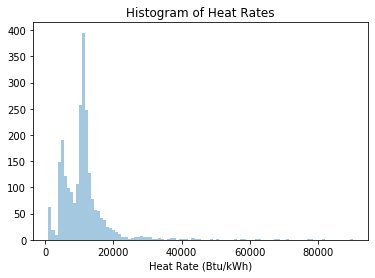

In [19]:
sns.distplot(heat_rate['Heat Rate (Btu/kWh)'].dropna(),norm_hist=False,kde=False,bins=100)
plt.title('Histogram of Heat Rates')

In [24]:
heat_rate.loc[heat_rate['Heat Rate (Btu/kWh)'] == heat_rate['Heat Rate (Btu/kWh)'].max()]

,Plant Code,Plant Name,State,Prime Mover,Fuel Consumption for Electric Generation (MMBtu),Generation (kWh),Heat Rate (Btu/kWh)
632,1316,Ottawa,KS,GT,2.794000e+09,31000.0,90129.032258
